In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Collecting seaborn
     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     ------------------------------------ - 286.7/294.9 kB 5.9 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
     --- ------------------------------------ 0.7/7.8 MB 45.4 MB/s eta 0:00:01
     --------- ------------------------------ 1.9/7.8 MB 24.0 MB/s eta 0:00:01
     -------------- ------------------------- 2.8/7.8 MB 25.7 MB/s eta 0:00:01
     ------------------- -------------------- 3.9/7.8 MB 22.4 MB/s eta 0:00:01
     -------------------------- ------------- 5.2/7.8 MB 23.8 MB/s eta 0:00:01
     ---------------------------- ----------- 5.6/7.8 MB 25.4 MB/s eta 0:00:01
     ------------------------------------- -- 7.3/7.8 MB 23.2 MB/s eta 0:00:01
     ---------------------------------------  7.8/7.8 MB 23


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\91705\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("Travel.csv")

CLEANINIG

In [6]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [7]:
df["Gender"]=df["Gender"].replace("Fe Male","Female")
df["MaritalStatus"]=df["MaritalStatus"].replace('Single','Unmarried')

In [12]:
missingValues_columnNames=[features for features in df.columns if df[features].isnull().sum()>=1]
for i in missingValues_columnNames:
    print(i," >> ",np.round(df[i].isnull().mean()*100,5),' % of missing values')

Age  >>  4.62357  % of missing values
TypeofContact  >>  0.51146  % of missing values
DurationOfPitch  >>  5.13502  % of missing values
NumberOfFollowups  >>  0.92062  % of missing values
PreferredPropertyStar  >>  0.53191  % of missing values
NumberOfTrips  >>  2.86416  % of missing values
NumberOfChildrenVisiting  >>  1.35025  % of missing values
MonthlyIncome  >>  4.76678  % of missing values


In [13]:
df.Age.fillna(df.Age.median(),inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
df.NumberOfTrips.fillna(0,inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [15]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [17]:
df.drop('CustomerID',inplace=True,axis=1)

FEATURE ENGINEERING

In [27]:
df['TotalVisiting']=df['NumberOfChildrenVisiting']+df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],inplace=True,axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4888 non-null   float64
 2   TypeofContact             4888 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4888 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4888 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4888 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4888 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [28]:
num_features=[features for features in df.columns if df[features].dtype !='O']
print('numerical features are : ',num_features)

numerical features are :  ['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting']


In [29]:
cat_features=[features for features in df.columns if df[features].dtype =='O']
print('categorical features are : ',cat_features)

categorical features are :  ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [31]:
discrete_features=[features for features in num_features if len(df[features].unique())<=25]
continuous_features=[features for features in num_features if features  not in discrete_features]


In [32]:
x=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
x_train.shape,x_test.shape

((3910, 17), (978, 17))

In [34]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [38]:
cat_features=x.select_dtypes(include='object').columns
num_features=x.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder : ",oh_transformer,cat_features),
        ("standardScaler : ",num_transformer,num_features)
    ]
)



In [39]:
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

MACHINE LEARNING TRAINING

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [52]:
models={
    "Random Forest":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)


#TRAINING SET PERFORMANCE

    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)

#TESTING SET PERFORMANCE

    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Traninig Set')
    print('-Accuracy : {:.4f}'.format(model_train_accuracy))
    print('-F1 Score : {:.4f}'.format(model_train_f1))
    print('-Precision : {:.4f}'.format(model_train_precision))
    print('-Recall : {:.4f}'.format(model_train_recall))
    print('-ROC AUC Score : {:.4f}'.format(model_train_rocauc_score))


    print("-----------------------------------------------------------------------------")


    print('Model performance for Testing Set')
    print('-Accuracy : {:.4f}'.format(model_test_accuracy))
    print('-F1 Score : {:.4f}'.format(model_test_f1))
    print('-Precision : {:.4f}'.format(model_test_precision))
    print('-Recall : {:.4f}'.format(model_test_recall))
    print('-ROC AUC Score : {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')


    


Random Forest
Model performance for Traninig Set
-Accuracy : 1.0000
-F1 Score : 1.0000
-Precision : 1.0000
-Recall : 1.0000
-ROC AUC Score : 1.0000
-----------------------------------------------------------------------------
Model performance for Testing Set
-Accuracy : 0.9294
-F1 Score : 0.9230
-Precision : 0.9423
-Recall : 0.6087
-ROC AUC Score : 0.8007


Decision Tree
Model performance for Traninig Set
-Accuracy : 1.0000
-F1 Score : 1.0000
-Precision : 1.0000
-Recall : 1.0000
-ROC AUC Score : 1.0000
-----------------------------------------------------------------------------
Model performance for Testing Set
-Accuracy : 0.9141
-F1 Score : 0.9168
-Precision : 0.7037
-Recall : 0.8261
-ROC AUC Score : 0.8788




HYPERPARAMETER TUNNING
as we can see that random forest is performing better 

In [53]:
rf_params={
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

In [57]:
randomcv_models=[
    ("RF",RandomForestClassifier(),rf_params)
]

In [58]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}

for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,
                              param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f"--------Best params for {model_name}-----------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
--------Best params for RF-----------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [60]:
#TRAINING THE MODEL WITH RESULTS WE GOT

models={
    "Random Forest":RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, max_features= 8, max_depth= None)
   # "Decision Tree":DecisionTreeClassifier(),
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)


#TRAINING SET PERFORMANCE

    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)

#TESTING SET PERFORMANCE

    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Traninig Set')
    print('-Accuracy : {:.4f}'.format(model_train_accuracy))
    print('-F1 Score : {:.4f}'.format(model_train_f1))
    print('-Precision : {:.4f}'.format(model_train_precision))
    print('-Recall : {:.4f}'.format(model_train_recall))
    print('-ROC AUC Score : {:.4f}'.format(model_train_rocauc_score))


    print("-----------------------------------------------------------------------------")


    print('Model performance for Testing Set')
    print('-Accuracy : {:.4f}'.format(model_test_accuracy))
    print('-F1 Score : {:.4f}'.format(model_test_f1))
    print('-Precision : {:.4f}'.format(model_test_precision))
    print('-Recall : {:.4f}'.format(model_test_recall))
    print('-ROC AUC Score : {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')


    


Random Forest
Model performance for Traninig Set
-Accuracy : 1.0000
-F1 Score : 1.0000
-Precision : 1.0000
-Recall : 1.0000
-ROC AUC Score : 1.0000
-----------------------------------------------------------------------------
Model performance for Testing Set
-Accuracy : 0.9458
-F1 Score : 0.9429
-Precision : 0.9355
-Recall : 0.7205
-ROC AUC Score : 0.8554




PLOT FOR ROC AOC CURVE

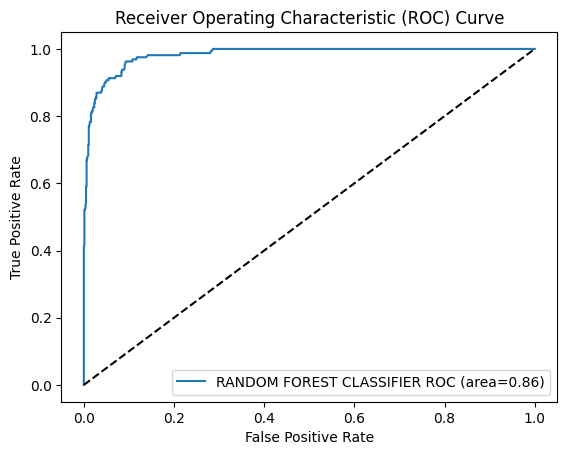

In [64]:
from sklearn.metrics import roc_curve,roc_auc_score
plt.figure()

auc_models = [
    {
        'label': 'RANDOM FOREST CLASSIFIER',
        'model': RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features=8, max_depth=None),
        'auc': 0.8554  # Example AUC value; this should be calculated after fitting the model
    },
]

for algo in auc_models:
    model = algo['model']
    model.fit(x_train, y_train)

    # Get false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])

    # Plot ROC curve with AUC value in the label
    plt.plot(fpr, tpr, label='%s ROC (area=%0.2f)' % (algo['label'], algo['auc']))

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show plot
plt.show()